In [2]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

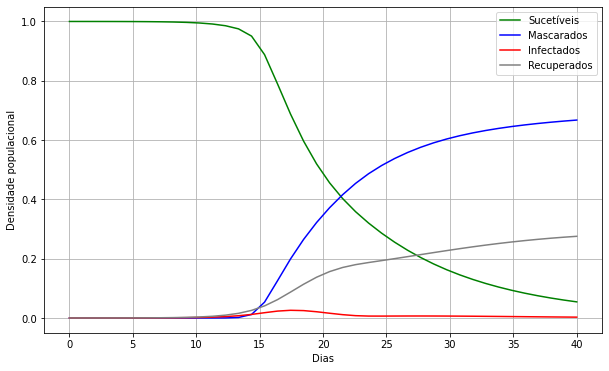

In [10]:
# SMIR + tanh

def smir(t, y, β, ε, δ):
    s, m, i, r = y
    
    δ = - A*np.tanh(t-t_δ) + M
    ε = - B*np.tanh(t-t_ε) + N
    
    dsdt = - β*s*i - δ*s
    dmdt = δ*s - ε*m*i
    didt = β*s*i + ε*m*i - i
    drdt = i
    return dsdt, dmdt, didt, drdt

δ0 = 0
δ  = 0.1
M = (δ0+δ)/2
A = δ0 - M
t_δ = 15

ε0 = 0
ε  = 1.2
N = (ε0+ε)/2
B = ε0 - N
t_ε = 23

β = 1.5

t0, t = 0, 40
i0 = 1e-5
r0 = 0
m0 = 0
s0 = 1 - m0 - i0 - r0

t_discreto = np.linspace(t0,t,t)

res = solve_ivp(smir, (t0, t), y0=[s0, m0, i0, r0], args=( β, ε, δ), t_eval=t_discreto, method='LSODA')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(res.t, res.y[0], 'g', label='Sucetíveis')
ax.plot(res.t, res.y[1], 'b', label='Mascarados')
ax.plot(res.t, res.y[2], 'r', label='Infectados')
ax.plot(res.t, res.y[3], 'gray', label='Recuperados')

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias')
ax.legend(frameon='False')
#ax.set_ylim([0,1e-1])


(0.0, 0.1)

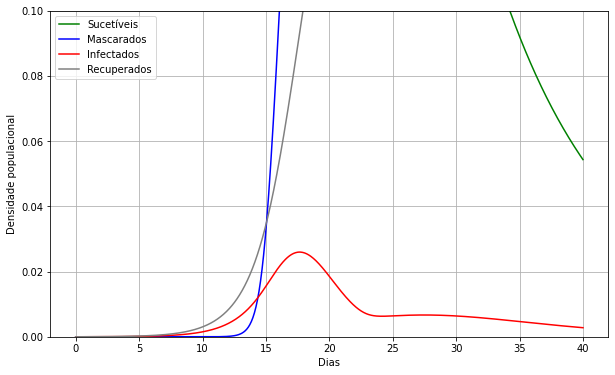

In [9]:
# SMIR + tanh

def smir(t, y, β, ε):
    s, m, i, r = y
    
    δ = - A*np.tanh(t-t_δ) + M
    ε = - B*np.tanh(t-t_ε) + N
    
    dsdt = - β*s*i - δ*s
    dmdt = δ*s - ε*m*i
    didt = β*s*i + ε*m*i - i
    drdt = i
    
    return dsdt, dmdt, didt, drdt


δ0 = 0
δ  = 0.1
M = (δ0+δ)/2
A = δ0 - M
t_δ = 15

ε0 = 0
ε  = 1.2
N = (ε0+ε)/2
B = ε0 - N
t_ε = 23

β = 1.5

t0, t = 0, 40
i0 = 1e-5
r0 = 0
m0 = 0
s0 = 1 - m0 - i0 - r0

t_discreto = np.linspace(t0,t,1000)

res = solve_ivp(smir, (t0, t), y0=[s0, m0, i0, r0], args=( β, ε), t_eval=t_discreto, method='LSODA')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(res.t, res.y[0], 'g', label='Sucetíveis')
ax.plot(res.t, res.y[1], 'b', label='Mascarados')
ax.plot(res.t, res.y[2], 'r', label='Infectados')
ax.plot(res.t, res.y[3], 'gray', label='Recuperados')

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias')
ax.legend(frameon='False')
ax.set_ylim([0,1e-1])



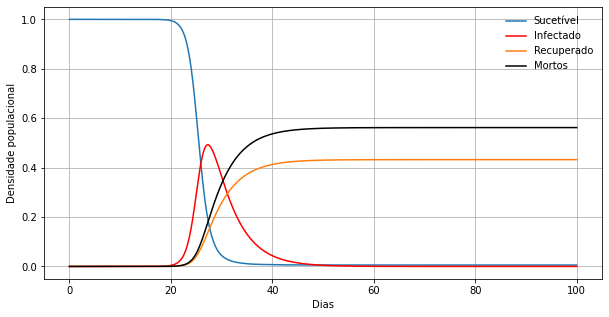

In [3]:
# SIRD

def sird(t,y, beta, gamma, delta):
    s, i, d, r = y
    dsdt = -beta*s*i
    didt = beta*s*i - gamma*i - delta*i
    drdt = gamma*i
    dmdt = delta*i
    
    return dsdt, didt, drdt, dmdt

beta  = 1.2
gamma = 0.1
delta = 0.13

t0, t = 0, 100
i0 = 1e-10
r0 = 0
m0 = 0
s0 = 1 - i0 - r0 - m0


resolucao_curva = np.linspace(t0,t,1000)
res = solve_ivp(sird, (t0, t), y0=[s0, i0, r0, m0], args=(beta, gamma, delta), t_eval=resolucao_curva )


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0], label='Sucetível')
ax.plot(res.t, res.y[1], 'r', label='Infectado')
ax.plot(res.t, res.y[2], label='Recuperado')
ax.plot(res.t, res.y[3], 'k', label='Mortos')

ax.grid(True)
ax.set_xlabel('Dias')
ax.set_ylabel('Densidade populacional')
ax.legend(frameon=False)


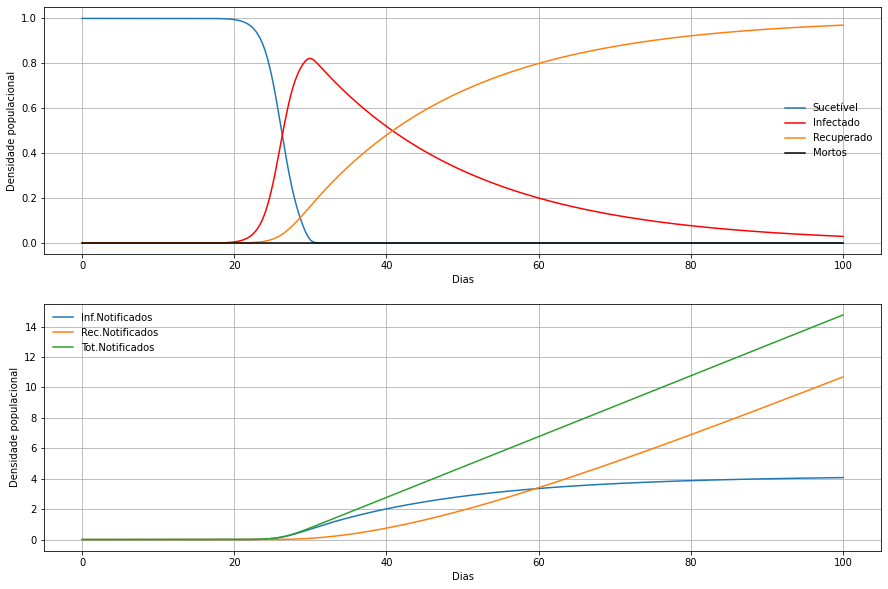

In [13]:
# SIRD do Artigo

def sird(t,y, beta, gamma, delta, teta):
    s, i, r, m, I, R, C = y

    mo_t = - C*np.tanh((t - t_nova_variante)) + O
    m_t = (m*(1-v_t)) + (m*(1 - efi)*v_t)*mo_t
    a = - A*np.tanh((t - t_restrição)) + M
    b = - B*np.tanh((t - t_nova_variante)) + N
    
    beta__t = a*b*beta_inicial
    delta__m_t = m_t/(t1+t2)
    gamma__m_t = (1 - m_t)/(t1+t3)
    
    dsdt = -beta__t*s*i
    didt = beta__t*s*i - gamma__m_t*i - delta__m_t*i
    drdt = gamma__m_t*i
    dmdt = delta__m_t*i
    
    I = teta*i
    R = teta*r
    C = I + R + m
        
    return dsdt, didt, drdt, dmdt, I, R, C


beta_inicial = 1.1
teta = 0.2

t1 =   7    # Período de incubação
t2 =   14   # Período entre os primeiros sintomas e a morte.
t3 =   14   # Período entre os primeiros sintomas e a recuperação

v_t =  0.1  # Porcentagem de pessoas vacinadas (porcentagem de indivíduos inicialmente vacinados)
efi =  0.6  # Redução na mortalidade em uma população completamente vacinada
mo_t = 0.5  # Mortalidade durante a Ômicron

mo1 = 1
mo2 = 1         # Variação Mortalidade da nova variante
O = (mo1+mo2)/2
C = mo1 - O

t_restrição = 20
t_nova_variante = 30

a1 = 1
a2 = 0.8         # Medidas restritivas (reduz o beta)
M = (a1+a2)/2
A = a1 - M

b1 = 1
b2 = 6           # Nova variante (aumenta o beta)
N = (b1+b2)/2
B = b1 - N

t0, t = 0, 100
i0 = 1e-10
r0 = 0
m0 = 0
I0 = 0
R0 = 0
C0 = 0

s_rate = 1

s0 = 1 - i0 - r0*(1-s_rate) - m0 - I0 - R0 - C0

resolucao_curva = np.linspace(t0,t,1000)
res = solve_ivp(sird, (t0, t), y0=[s0, i0, r0, m0, I0, R0, C0], args=(beta, gamma, delta, teta), t_eval=resolucao_curva )

fig, ax = plt.subplots(figsize=(15,10), nrows=2)
ax[0].plot(res.t, res.y[0], label='Sucetível')
ax[0].plot(res.t, res.y[1], 'r', label='Infectado')
ax[0].plot(res.t, res.y[2], label='Recuperado')
ax[0].plot(res.t, res.y[3], 'k', label='Mortos')

ax[1].plot(res.t, res.y[4], label='Inf.Notificados')
ax[1].plot(res.t, res.y[5], label='Rec.Notificados')
ax[1].plot(res.t, res.y[6], label='Tot.Notificados')

ax[0].grid(True)
ax[0].set_xlabel('Dias')
ax[0].set_ylabel('Densidade populacional')
ax[0].legend(frameon=False)

ax[1].grid(True)
ax[1].set_xlabel('Dias')
ax[1].set_ylabel('Densidade populacional')
ax[1].legend(frameon=False)
